In [1]:
%load_ext version_information

In [2]:
import numpy as np
import pandas as pd
import zipfile
import json
import matplotlib.pyplot as plt

In [38]:
%matplotlib inline
plt.style.use('default')

# 2. Datenvorverarbeitung mit Pandas: Food Nutrient Database

### a. Entpacken, Einlesen und Umwandlung der Datenbank in ein geeignetes Python Format

In [66]:
zf= zipfile.ZipFile('/home/benny/Documents/Master/ML/Ubungen/foods-2011-10-03.json.zip') 
f = zf.open('foods-2011-10-03.json')
data = json.load(f)

Ausgabe der Keys und Anzeige von beliebigen Einträgen in der Nährstoffliste.

In [67]:
dict = data[0]
dict.keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

Die Nährstoffe eines beliebigen Lebensmittel liegen weitere Dictionarys innerhalb einer Liste vor.

In [68]:
dict['nutrients']

[{'value': 25.18,
  'units': 'g',
  'description': 'Protein',
  'group': 'Composition'},
 {'value': 29.2,
  'units': 'g',
  'description': 'Total lipid (fat)',
  'group': 'Composition'},
 {'value': 3.06,
  'units': 'g',
  'description': 'Carbohydrate, by difference',
  'group': 'Composition'},
 {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
 {'value': 376.0, 'units': 'kcal', 'description': 'Energy', 'group': 'Energy'},
 {'value': 39.28,
  'units': 'g',
  'description': 'Water',
  'group': 'Composition'},
 {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
 {'value': 0.0,
  'units': 'g',
  'description': 'Fiber, total dietary',
  'group': 'Composition'},
 {'value': 673.0,
  'units': 'mg',
  'description': 'Calcium, Ca',
  'group': 'Elements'},
 {'value': 0.64,
  'units': 'mg',
  'description': 'Iron, Fe',
  'group': 'Elements'},
 {'value': 22.0,
  'units': 'mg',
  'description': 'Magnesium, Mg',
  'group': 'Elements'},
 {'value': 490.0,

In [69]:
dict['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

### b. Aufbereitung der Daten

Dataframe **info**: Felder *description*, *group*, *id*, *manufacturer* in eigenes DataFrame **info** kopiern.

In [70]:
keys = ['description','group','id','manufacturer']
info = pd.DataFrame(columns=keys)
for dict in data:
    elem = {k:dict[k] for k in keys if k in dict}
    info = info.append(elem, ignore_index=True)

In [71]:
info = info.rename(columns={'group': 'food_group', 'description': 'food_description'})
info.head()

,food_description,food_group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


__________________
Dataframe **nutrients**: Entsprechende ID an Dataframe des jeweiligen Nährstoffes anhängen.

In [72]:
nutrients = pd.DataFrame()
for dict in data:
    df = pd.DataFrame(dict['nutrients'])
    df = df.assign(id=dict['id'])
    nutrients = pd.concat([nutrients, df])

In [73]:
nutrients = nutrients.drop_duplicates()

In [74]:
nutrients = nutrients.rename(columns={'description': 'nutrients_description', 'group': 'nutrients_group'})
nutrients.head()

,value,units,nutrients_description,nutrients_group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


_____________
Dataframes **info** und **nutrients** mergen.

In [106]:
result = pd.merge(nutrients, info, on='id', how='outer')
result.head()

,value,units,nutrients_description,nutrients_group,id,food_description,food_group,manufacturer
0,25.18,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.20,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.06,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.28,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.00,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,


### c. Explorative Analyse des Gehalts des Spurenele-mentes Zink

Labelindizierung auf **nutrients_description**, um mit .loc Element zu filter

In [95]:
result.set_index('nutrients_description', inplace=True)

In [96]:
zinkRes = result.loc['Zinc, Zn']
zinkRes.head()

,value,units,nutrients_group,id,food_description,food_group,manufacturer
nutrients_description,,,,,,,
"Zinc, Zn",2.94,mg,Elements,1008,"Cheese, caraway",Dairy and Egg Products,
"Zinc, Zn",3.11,mg,Elements,1009,"Cheese, cheddar",Dairy and Egg Products,
"Zinc, Zn",3.75,mg,Elements,1018,"Cheese, edam",Dairy and Egg Products,
"Zinc, Zn",2.88,mg,Elements,1019,"Cheese, feta",Dairy and Egg Products,
"Zinc, Zn",2.76,mg,Elements,1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,


__________________________________________
Spalte **value** mit Zinkgehalt in mg auswählen.

In [97]:
zinkVals = zinkRes['value']
zinkVals.head()

nutrients_description
Zinc, Zn    2.94
Zinc, Zn    3.11
Zinc, Zn    3.75
Zinc, Zn    2.88
Zinc, Zn    2.76
Name: value, dtype: float64

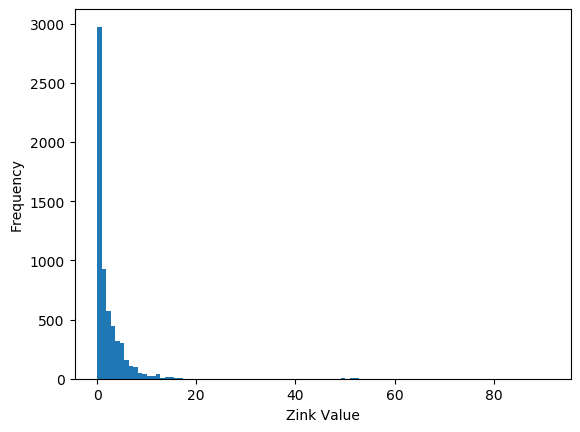

In [98]:
plt.hist(zinkVals, 100)
plt.xlabel('Zink Value')
plt.ylabel('Frequency')
plt.show()

________________________________________
Statistische Beschreibung der numerischen Variablen mit Dataframe.describe()

In [99]:
zinkVals.describe()

count    6137.000000
mean        2.228589
std         3.975321
min         0.000000
25%         0.340000
50%         0.980000
75%         2.980000
max        90.950000
Name: value, dtype: float64

______________________________________
Finden Sie in Ihrer Tabelle Edamer(’Cheese, edam’)

In [100]:
zinkRes.set_index('food_description', inplace=True)

In [101]:
zinkEdam = zinkRes.loc[['Cheese, edam']]
zinkEdam

,value,units,nutrients_group,id,food_group,manufacturer
food_description,,,,,,
"Cheese, edam",3.75,mg,Elements,1018,Dairy and Egg Products,


________________________________________
Hat Edamer einen überdurchschnittlichen Zinkgehalt?

In [102]:
zinkMean = zinkVals.mean()
zinkEdamVal = zinkRes.loc['Cheese, edam']['value']

zinkEdamVal > zinkMean

True

_______________________________________
Haben mehr als 75% aller Nahrungsmittel einen kleineren Zinkgehalt?

In [103]:
zinkVals.quantile([.75]) < zinkEdamVal

0.75    True
Name: value, dtype: bool

__________________________
Welches Nahrungsmittel hat den maximalen Zinkgehalt?

In [129]:
zinkRes[['value']][zinkRes['value']==zinkRes['value'].max()]

,value
food_description,
"Mollusks, oyster, eastern, canned",90.95


In [130]:
%version_information numpy, pandas

Software versions
Python 3.7.6 64bit [GCC 7.3.0]
IPython 7.12.0
OS Linux 5.4.0 52 generic x86_64 with debian bullseye sid
numpy 1.18.1
pandas 1.0.1
Sun Nov 01 15:07:35 2020 CET